# Project 15 - Potability of water
Giulia Guglielmi & Sundaresan Karunakaran

## Imports

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

## Importing the dataset

In [2]:
data = pd.read_csv('water_potability.csv')

## Descriptive analysis

In [5]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


From this we can infer that we have some null (NaN) values in our dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<Axes: >

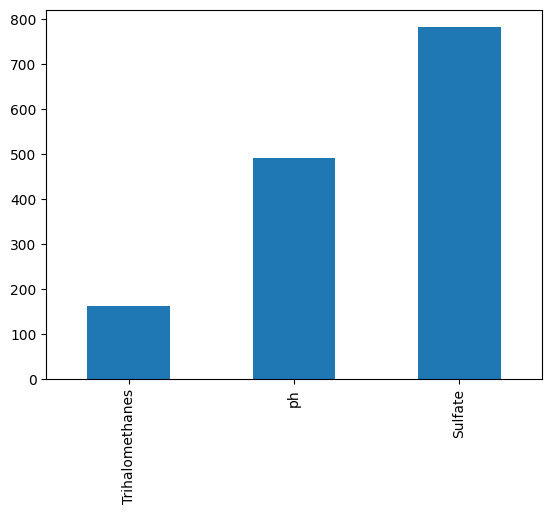

In [8]:
null_values = data.isnull().sum()
null_values = null_values[null_values > 0]
null_values.sort_values(inplace=True)
null_values.plot.bar()

From this we can see that the only features that have null values are Sulfate, Ph and Trihalomethanes.

In [7]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

The featuers are all numerical attributes (float and int)

In [9]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


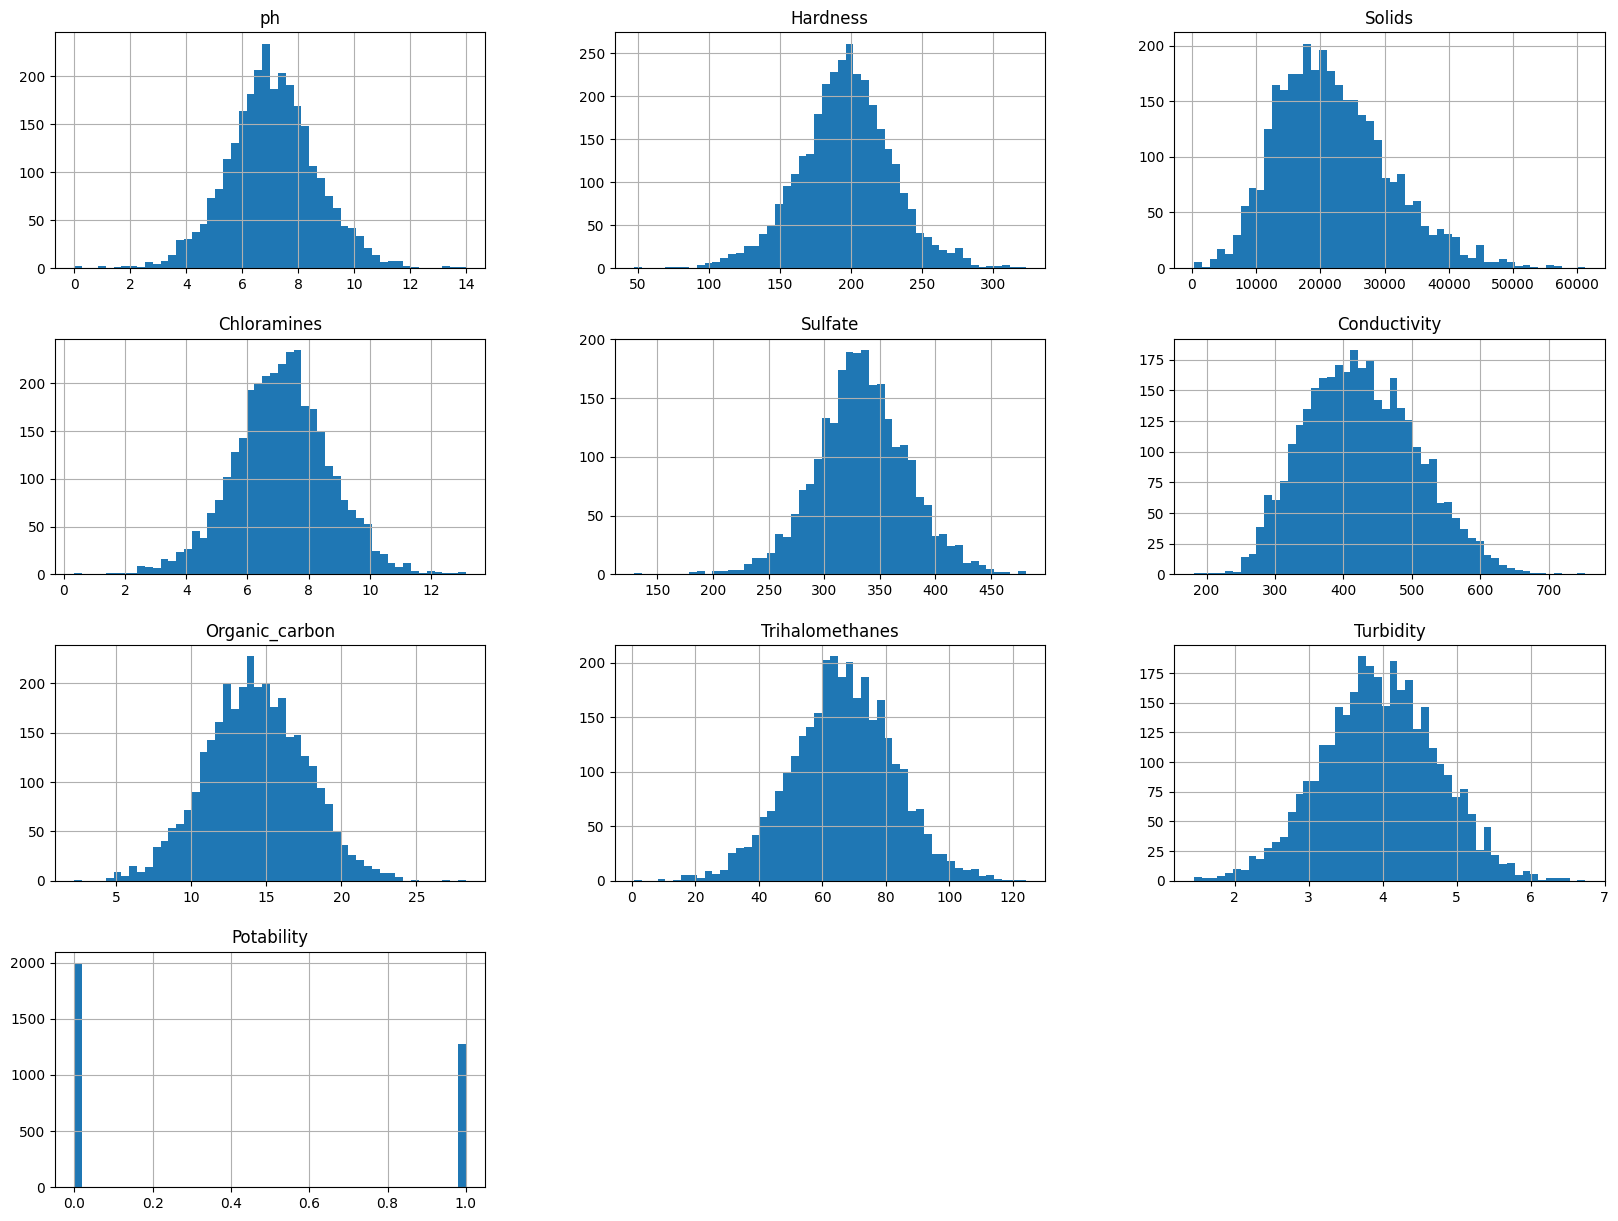

In [11]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In these graphs, we can infer that pH, Hardness, Chloramines, Sulfate, and Organic Carbon follow a normal distribution. However, the others exhibit significant skewness and kurtosis, making it difficult to establish their normal distribution.

<Axes: >

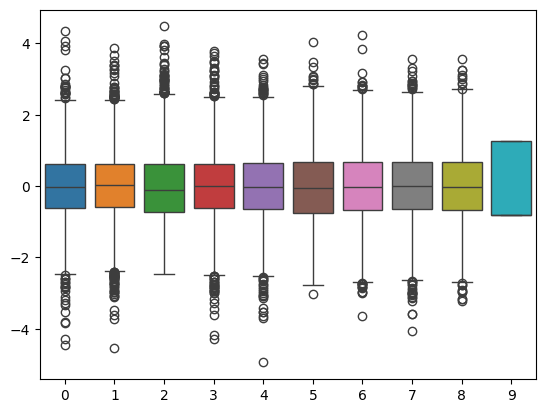

In [12]:
#Some preprocessing to scale the colums
scaler = StandardScaler().fit(data)
scaled_data = scaler.transform(data)
sns.boxplot(scaled_data)

As you can see, there are some significant outliers and we need to remove them in the preprocessing so that our model is trained properly. 

In [13]:
correlation = data.corr()
print(correlation['Potability'].sort_values(ascending=False),"\n")

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64 



<Axes: title={'center': 'Correlation of different features of the dataset'}>

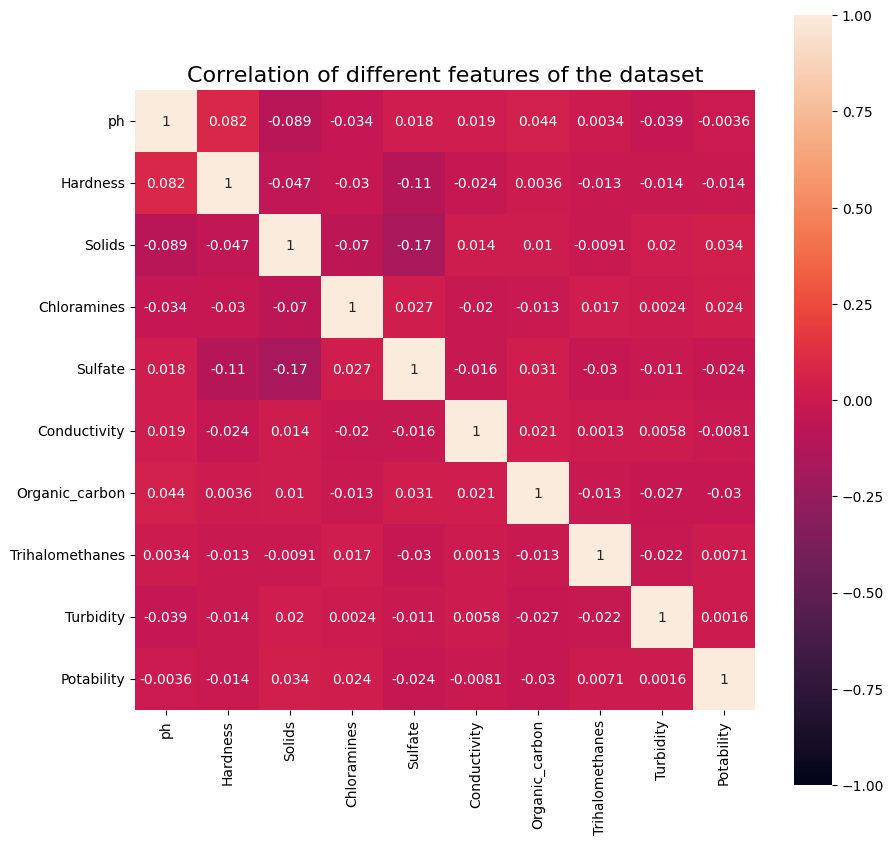

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Correlation of different features of the dataset", y=1, size=16)
sns.heatmap(correlation, square=True,annot=True, ax=ax, vmax=1, vmin=-1)

From this we can see that even though nere is not much correlation between different columns and the end potability itself, the different columns have some postitive and negative correlation amongst themselves which on average amounts to none.

In [15]:
for x in data.columns:
    if x =="ph":
        print(x)
        df_subset = data[((data[x] < 6.5) | (data['ph'] > 8.5))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Hardness':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >100))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Solids':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >1200))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Chloramines':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >4))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Sulfate':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >250))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Conductivity':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >400))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Organic_carbon':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >2))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2)) 
    if x== 'Trihalomethanes':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >80))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Turbidity':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >5))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))

ph
Potability
0    64.45
1    35.55
Name: proportion, dtype: float64
----------------
Hardness
Potability
0    61.16
1    38.84
Name: proportion, dtype: float64
----------------
Solids
Potability
0    61.01
1    38.99
Name: proportion, dtype: float64
----------------
Chloramines
Potability
0    61.03
1    38.97
Name: proportion, dtype: float64
----------------
Sulfate
Potability
0    61.22
1    38.78
Name: proportion, dtype: float64
----------------
Conductivity
Potability
0    61.16
1    38.84
Name: proportion, dtype: float64
----------------
Organic_carbon
Potability
0    60.99
1    39.01
Name: proportion, dtype: float64
----------------
Trihalomethanes
Potability
0    60.47
1    39.53
Name: proportion, dtype: float64
----------------
Turbidity
Potability
0    62.74
1    37.26
Name: proportion, dtype: float64


After analyzing the data from a statistical perspective, we intend to carefully examine whether they respect the prescribed standards:
* $6.5 < $ ph $ < 8.5$
* Hardness $< 100$ mg/L
* Solids $< 1000$ mg/L
* Chloramines $< 4$ mg/L
* Sulfate $< 250$ mg/L
* Conductivity $< 400$ μS/cm
* Organic_carbon $<2$ mg/L
* Trihalomethanes $< 80$ ppm
* Turbidity $< 5.00$ NTU


Through this script, we tried to verify whether water classified as potable actually met the strict standards set by the WHO. However, the results obtained did not meet expectations. In each category, 40% of the water considered potable was actually non-potable. These cases all represent false positives.